In [2]:
import numpy as np
import matplotlib.pyplot as plt
import estimator as est

Text(0.5, 1.0, 'Integrand of the derivative when pixelization=0.1 Mpc')

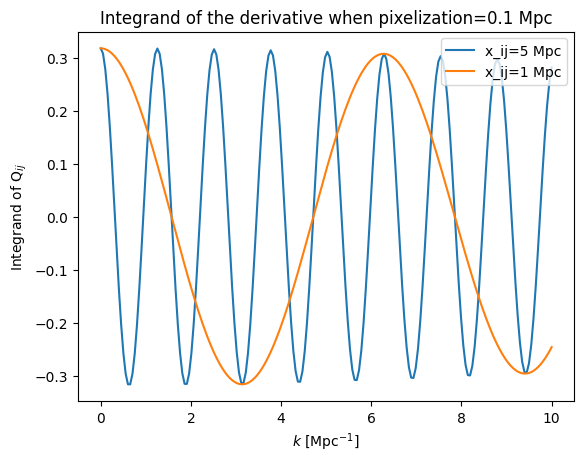

In [3]:
k = np.linspace(0,10,200)
x_ij = 5
pix_width=.1
deriv_intgrand = 1/np.pi * np.cos(k * x_ij)* np.sinc(k*pix_width/np.pi/2)**2
plt.plot(k,deriv_intgrand, label='x_ij={:d} Mpc'.format(x_ij))
x_ij = 1
deriv_intgrand = 1/np.pi * np.cos(k * x_ij)* (np.sinc(k*pix_width/np.pi/2))**2
plt.plot(k,deriv_intgrand, label='x_ij={:d} Mpc'.format(x_ij))

plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'Integrand of Q$_{ij}$')
plt.legend()
plt.title("Integrand of the derivative when pixelization=0.1 Mpc")

Fourier transform version

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Quantity to be Fourier transformed when pixelization=0.1 Mpc')

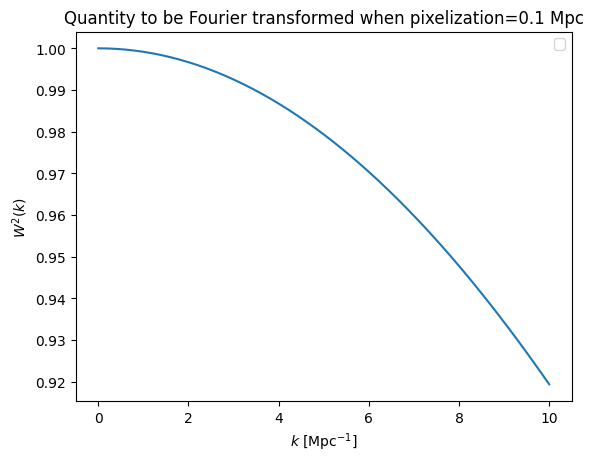

In [4]:
k = np.linspace(0,10,200)
x_ij = 5
pix_width=.1
f_k = np.sinc(k*pix_width/np.pi/2)**2
plt.plot(k,f_k)
# x_ij = 1
# deriv_intgrand = 1/np.pi * np.cos(k * x_ij)* (np.sinc(k*pix_width/np.pi/2))**2
# plt.plot(k,deriv_intgrand, label='x_ij={:d} Mpc'.format(x_ij))

plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'$W^2(k)$')
plt.legend()
plt.title("Quantity to be Fourier transformed when pixelization=0.1 Mpc")

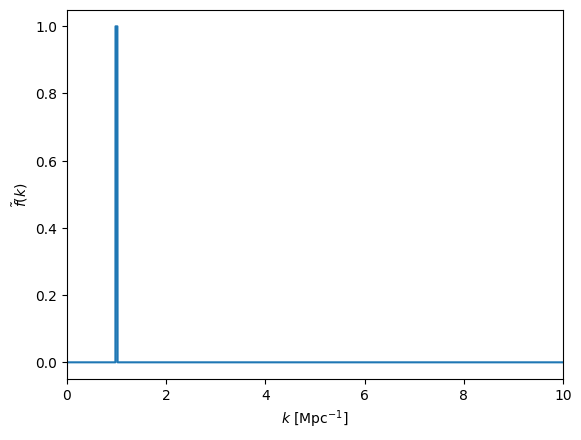

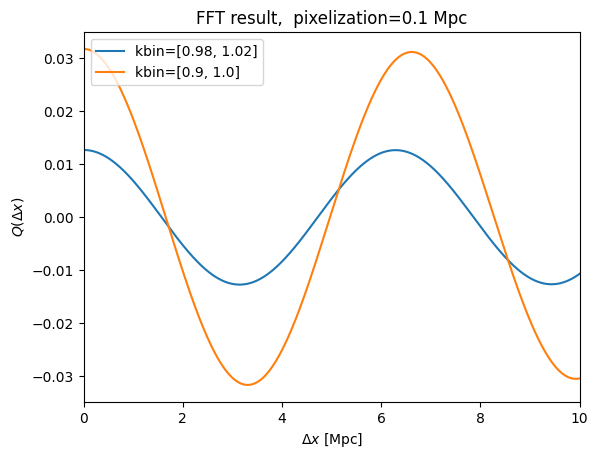

In [8]:
kbin = [0.98, 1.02]
kbin_spacing = kbin[1] - kbin[0]

# set up the FFT with fine spacing and large range
Nk_full = 100000
kmax = 200
kpar_range_full = np.linspace(0, kmax, Nk_full)
kspacing_full = kmax / Nk_full
f_k = (np.sinc(kpar_range_full*pix_width/np.pi/2))**2

# set the function to zero outside the kbin
f_k[kpar_range_full > kbin[1]] = 0
f_k[kpar_range_full < kbin[0]] = 0
plt.plot(kpar_range_full, f_k)
plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'$\tilde{f}(k)$')
plt.xlim([0, 10])
plt.show()
plt.clf()
f_x_full = (
    np.fft.irfft(f_k) * Nk_full * kspacing_full / (np.pi) 
)  # into units of Mpc-1 ?
delta_x_spacing = np.pi / (kpar_range_full[-1] - kpar_range_full[0]) # something wrong with this line?
# print(delta_x_spacing, "compared to Nyquist frequency", np.pi/kmax)
Nx = 2 * (Nk_full - 1)
x = np.arange(Nx) * delta_x_spacing
# print(x[1]-x[0], "is the spacing between x values")
plt.plot(x, f_x_full, label=f"kbin={kbin}")
plt.xlabel(r'$x$ [Mpc]')
plt.ylabel(r'$f(x)$')
plt.xlim([0, 10])
plt.title("Function in real space when pixelization=0.1 Mpc")

kbin = [0.9, 1.0]
kbin_spacing = kbin[1] - kbin[0]

# set up the FFT with fine spacing and large range
Nk_full = 100000
kmax = 200
kpar_range_full = np.linspace(0, kmax, Nk_full)
kspacing_full = kmax / Nk_full
f_k = (np.sinc(kpar_range_full*pix_width/np.pi/2))**2

# set the function to zero outside the kbin
f_k[kpar_range_full > kbin[1]] = 0
f_k[kpar_range_full < kbin[0]] = 0

f_x_full = (
    np.fft.irfft(f_k) * Nk_full * kspacing_full / (np.pi) 
)  # into units of Mpc-1 ?
delta_x_spacing = np.pi / (kpar_range_full[-1] - kpar_range_full[0]) # something wrong with this line?
# print(delta_x_spacing, "compared to Nyquist frequency", np.pi/kmax)
Nx = 2 * (Nk_full - 1)
x = np.arange(Nx) * delta_x_spacing
# print(x[1]-x[0], "is the spacing between x values")
plt.plot(x, f_x_full, label=f"kbin={kbin}")
plt.xlabel(r'$\Delta x$ [Mpc]')
plt.ylabel(r'$Q(\Delta x)$')
plt.xlim([0, 10])
plt.title("FFT result,  pixelization=0.1 Mpc")
plt.legend()

In [78]:
def analytic_Qij(x_ij, kbin):
    term4 = np.sin(kbin[1] * x_ij)
    term5 = np.sin(kbin[0] * x_ij)
    term6 = (1 / (np.pi * x_ij)) * (term4 - term5)
    return term6

Text(0, 0.5, '$Q(\\Delta x)$')

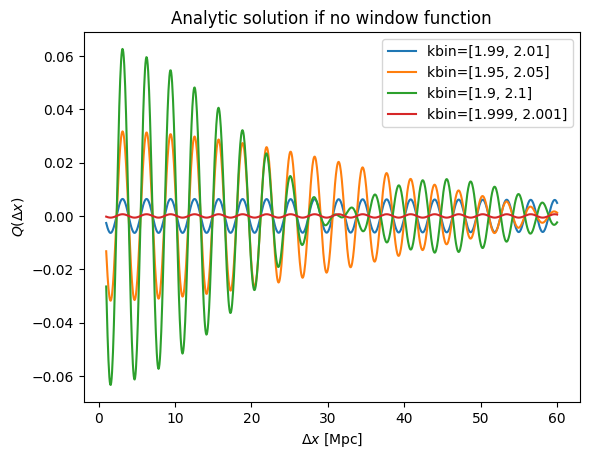

In [83]:
kbin = [1.99, 2.01]
delta_k = kbin[1] - kbin[0]
delta_x = np.linspace(1,60,1000)
plt.plot(delta_x, analytic_Qij(delta_x, kbin), label='kbin={}'.format(kbin))
kbin = [1.95, 2.05]
delta_k = kbin[1] - kbin[0]
plt.plot(delta_x, analytic_Qij(delta_x, kbin), label='kbin={}'.format(kbin))
kbin = [1.9, 2.1]
delta_k = kbin[1] - kbin[0]
plt.plot(delta_x, analytic_Qij(delta_x, kbin), label='kbin={}'.format(kbin))
kbin = [1.999, 2.001]
delta_k = kbin[1] - kbin[0]
plt.plot(delta_x, analytic_Qij(delta_x, kbin), label='kbin={}'.format(kbin))
plt.title("Analytic solution if no window function")
plt.legend()
plt.xlabel(r'$\Delta x$ [Mpc]')
plt.ylabel(r'$Q(\Delta x)$')

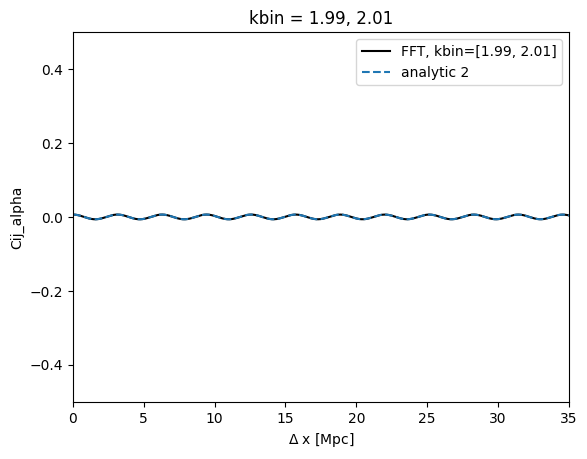

In [71]:
# compare analytic result to numerical result
kbin = [1.99, 2.01]
delta_k = kbin[1] - kbin[0]
delta_x = np.linspace(0,60,30)
pix_width = 0.1

kbin_spacing = kbin[1] - kbin[0]

# set up the FFT with fine spacing and large range
Nk_full = 100000
kmax = 200
kpar_range_full = np.linspace(0, kmax, Nk_full)
kspacing_full = kmax / Nk_full
# f_k = est.w_k(kpar_range_full, pix_width) ** 2
f_k = np.ones(len(kpar_range_full))
# set the function to zero outside the kbin
f_k[kpar_range_full > kbin[1]] = 0
f_k[kpar_range_full < kbin[0]] = 0

f_x_full = (
    np.fft.irfft(f_k) * Nk_full * kspacing_full / (np.pi) 
)  # into units of Mpc-1 ?
delta_x_spacing = np.pi / (kpar_range_full[-1] - kpar_range_full[0]) # something wrong with this line?
# print(delta_x_spacing, "compared to Nyquist frequency", np.pi/kmax)
Nx = 2 * (Nk_full - 1)
x = np.arange(Nx) * delta_x_spacing
# print(x[1]-x[0], "is the spacing between x values")


# uncomment the following to check against brute-force integration
kpar_range = np.linspace(kbin[0], kbin[1], 200)
# w_kpar = est.w_k(kpar_range, pix_width)
w_kpar = np.ones(len(kpar_range))
# for delx in delta_x:
#     y = (
#         1.0 / (np.pi) * np.cos(kpar_range * delx) * w_kpar**2
#     )  # taking away the factor of 2 in denom, since we're representing with cos
#     Q_ij = np.trapz(y, x=kpar_range) # needs units of Mpc^-1
#     plt.plot(delx, Q_ij, "o", alpha=1, color="black")
#     plt.xlim([0, np.amax(delta_x)])
plt.plot(x, f_x_full, label=f"FFT, kbin={kbin}", color="black")
# ksum = kbin[0] + kbin[1]
# term1 = np.sinc(delta_k * x[1:] / (2 * np.pi))  # Using sinc for delta_k*x/2
# term2 = np.cos(ksum * x[1:] / 2)
# term3 = (2 / (np.pi * x[1:])) * term1 * term2
# plt.plot(x[1:], term3, label="analytic", linestyle='dotted')
# plt.plot(x[1:], 2/(np.pi*x[1:])*np.sin(delta_k*x[1:]/2)/x[1:]*np.cos(ksum*x[1:]/2), label="analytic")
term4 = np.sin(kbin[1] * x[1:])
term5 = np.sin(kbin[0] * x[1:])
term6 = (1 / (np.pi * x[1:])) * (term4 - term5)
plt.plot(x[1:], term6, label="analytic 2", linestyle='--')
# plt.plot(x[1:], 1/(np.pi)*(np.sin(kbin[1]*x[1:])/x[1:]-np.sin(kbin[0]*x[1:])/x[1:]), label="analytic 2")
plt.title("kbin = {:.2f}, {:.2f}".format(kbin[0], kbin[1]))

plt.xlabel(r"$\Delta$ x [Mpc]")
plt.ylim([-.5,.5])
plt.xlim([0,35])
plt.ylabel("Cij_alpha")
plt.legend()


In [40]:
kbin[1]

2.01

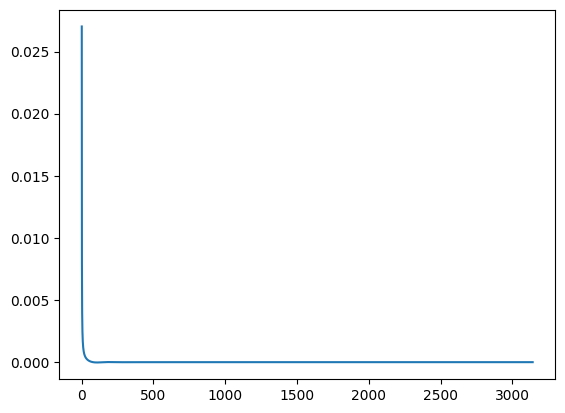

In [20]:
plt.plot(x[30:],2/(np.pi*x[30:])*np.sin(delta_k*x[30:]/2)/x[30:]*np.cos(delta_k*x[30:]/2))

In [9]:
x

array([0.00000000e+00, 1.57079633e-02, 3.14159265e-02, ...,
       3.14151411e+03, 3.14152982e+03, 3.14154553e+03])

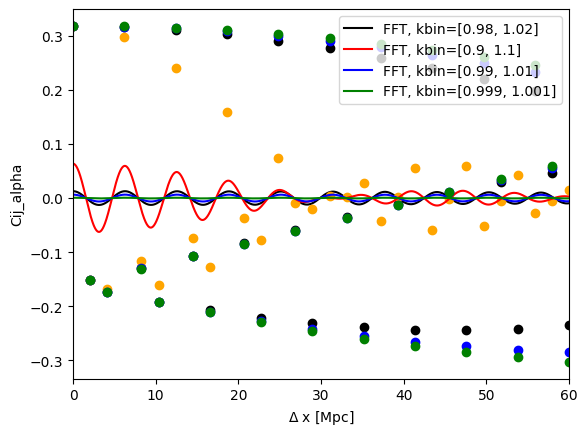

In [4]:
kbin = [0.98, 1.02]
delta_k = kbin[1] - kbin[0]
delta_x = np.linspace(0,60,30)
pix_width = 0.1

kbin_spacing = kbin[1] - kbin[0]

# set up the FFT with fine spacing and large range
Nk_full = 100000
kmax = 200
kpar_range_full = np.linspace(0, kmax, Nk_full)
kspacing_full = kmax / Nk_full
f_k = est.w_k(kpar_range_full, pix_width) ** 2
# set the function to zero outside the kbin
f_k[kpar_range_full > kbin[1]] = 0
f_k[kpar_range_full < kbin[0]] = 0

f_x_full = (
    np.fft.irfft(f_k) * Nk_full * kspacing_full / (np.pi) 
)  # into units of Mpc-1 ?
delta_x_spacing = np.pi / (kpar_range_full[-1] - kpar_range_full[0]) # something wrong with this line?
# print(delta_x_spacing, "compared to Nyquist frequency", np.pi/kmax)
Nx = 2 * (Nk_full - 1)
x = np.arange(Nx) * delta_x_spacing
# print(x[1]-x[0], "is the spacing between x values")


# uncomment the following to check against brute-force integration
kpar_range = np.linspace(kbin[0], kbin[1], 200)
# w_kpar = est.w_k(kpar_range, pix_width)
w_kpar = np.ones(len(kpar_range))
for delx in delta_x:
    y = (
        1.0 / (np.pi) * np.cos(kpar_range * delx) * w_kpar**2
    )  # taking away the factor of 2 in denom, since we're representing with cos
    Q_ij = np.trapz(y, x=kpar_range) # needs units of Mpc^-1
    plt.plot(delx, Q_ij/kbin_spacing, "o", alpha=1, color="black")
    plt.xlim([0, np.amax(delta_x)])
plt.plot(x, f_x_full/kbin_spacing, label=f"FFT, kbin={kbin}", color="black")

plt.xlabel(r"$\Delta$ x [Mpc]")
plt.ylabel("Cij_alpha")
plt.legend()



kbin = [0.9, 1.1]
delta_x = np.linspace(0,60,30)
pix_width = 0.1

kbin_spacing = kbin[1] - kbin[0]

# set up the FFT with fine spacing and large range
Nk_full = 100000
kmax = 200
kpar_range_full = np.linspace(0, kmax, Nk_full)
kspacing_full = kmax / Nk_full
f_k = est.w_k(kpar_range_full, pix_width) ** 2
# set the function to zero outside the kbin
f_k[kpar_range_full > kbin[1]] = 0
f_k[kpar_range_full < kbin[0]] = 0

f_x_full = (
    np.fft.irfft(f_k) * Nk_full * kspacing_full / (np.pi) 
)  # into units of Mpc-1 ?
delta_x_spacing = np.pi / (kpar_range_full[-1] - kpar_range_full[0]) # something wrong with this line?
# print(delta_x_spacing, "compared to Nyquist frequency", np.pi/kmax)
Nx = 2 * (Nk_full - 1)
x = np.arange(Nx) * delta_x_spacing
# print(x[1]-x[0], "is the spacing between x values")


# uncomment the following to check against brute-force integration
kpar_range = np.linspace(kbin[0], kbin[1], 200)
for delx in delta_x:
    y = (
        1.0 / (np.pi) * np.cos(kpar_range * delx) * w_kpar**2
    )  # taking away the factor of 2 in denom, since we're representing with cos
    Q_ij = np.trapz(y, x=kpar_range) # needs units of Mpc^-1
    plt.plot(delx, Q_ij/kbin_spacing, "o", alpha=1, color="orange")
    plt.xlim([0, np.amax(delta_x)])
plt.plot(x, f_x_full/kbin_spacing, label=f"FFT, kbin={kbin}", color="red")
plt.xlabel(r"$\Delta$ x [Mpc]")
plt.ylabel("Cij_alpha")
plt.legend()


kbin = [0.99, 1.01]
delta_x = np.linspace(0,60,30)
pix_width = 0.1

kbin_spacing = kbin[1] - kbin[0]

# set up the FFT with fine spacing and large range
Nk_full = 100000
kmax = 200
kpar_range_full = np.linspace(0, kmax, Nk_full)
kspacing_full = kmax / Nk_full
f_k = est.w_k(kpar_range_full, pix_width) ** 2
# set the function to zero outside the kbin
f_k[kpar_range_full > kbin[1]] = 0
f_k[kpar_range_full < kbin[0]] = 0

f_x_full = (
    np.fft.irfft(f_k) * Nk_full * kspacing_full / (np.pi) 
)  # into units of Mpc-1 ?
delta_x_spacing = np.pi / (kpar_range_full[-1] - kpar_range_full[0]) # something wrong with this line?
# print(delta_x_spacing, "compared to Nyquist frequency", np.pi/kmax)
Nx = 2 * (Nk_full - 1)
x = np.arange(Nx) * delta_x_spacing
# print(x[1]-x[0], "is the spacing between x values")


# uncomment the following to check against brute-force integration
kpar_range = np.linspace(kbin[0], kbin[1], 200)

for delx in delta_x:
    y = (
        1.0 / (np.pi) * np.cos(kpar_range * delx) * w_kpar**2
    )  # taking away the factor of 2 in denom, since we're representing with cos
    Q_ij = np.trapz(y, x=kpar_range) # needs units of Mpc^-1
    plt.plot(delx, Q_ij/kbin_spacing, "o", alpha=1, color="blue")
    plt.xlim([0, np.amax(delta_x)])
plt.plot(x, f_x_full/kbin_spacing, label=f"FFT, kbin={kbin}", color="blue")
plt.xlabel(r"$\Delta$ x [Mpc]")
plt.ylabel("Cij_alpha")
plt.legend()


kbin = [0.999, 1.001]

delta_x = np.linspace(0,60,30)
pix_width = 0.1

kbin_spacing = kbin[1] - kbin[0]

# set up the FFT with fine spacing and large range
Nk_full = 100000
kmax = 200
kpar_range_full = np.linspace(0, kmax, Nk_full)
kspacing_full = kmax / Nk_full
f_k = est.w_k(kpar_range_full, pix_width) ** 2
# set the function to zero outside the kbin
f_k[kpar_range_full > kbin[1]] = 0
f_k[kpar_range_full < kbin[0]] = 0

f_x_full = (
    np.fft.irfft(f_k) * Nk_full * kspacing_full / (np.pi) 
)  # into units of Mpc-1 ?
delta_x_spacing = np.pi / (kpar_range_full[-1] - kpar_range_full[0]) # something wrong with this line?
# print(delta_x_spacing, "compared to Nyquist frequency", np.pi/kmax)
Nx = 2 * (Nk_full - 1)
x = np.arange(Nx) * delta_x_spacing
# print(x[1]-x[0], "is the spacing between x values")


# uncomment the following to check against brute-force integration
kpar_range = np.linspace(kbin[0], kbin[1], 200)
for delx in delta_x:
    y = (
        1.0 / (np.pi) * np.cos(kpar_range * delx) * w_kpar**2
    )  # taking away the factor of 2 in denom, since we're representing with cos
    Q_ij = np.trapz(y, x=kpar_range) # needs units of Mpc^-1
    plt.plot(delx, Q_ij/kbin_spacing, "o", alpha=1, color="green")
    plt.xlim([0, np.amax(delta_x)])
plt.plot(x, f_x_full/kbin_spacing, label=f"FFT, kbin={kbin}", color="green")
plt.xlabel(r"$\Delta$ x [Mpc]")
plt.ylabel("Cij_alpha")
plt.legend()


